# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("D:\Restaurant Recommendation Project\data\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
# Drop unnecessary columns
df=df.drop(['url','dish_liked','phone'],axis=1) 

In [6]:
# Rename Column
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
rate         7775
location       21
rest_type     227
cuisines       45
cost          346
dtype: int64


In [8]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 43


In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Filter and display only 'cost' values containing a comma
rows_with_comma = df[df['cost'].str.contains(',', na=False)]['cost']
print(rows_with_comma)

67       1,200
119      1,000
166      1,200
207      1,500
217      1,300
         ...  
51708    1,200
51712    1,500
51714    2,000
51715    2,500
51716    1,500
Name: cost, Length: 6911, dtype: object


In [11]:
# Remove comma from `cost` column
# Changing the cost to string
df['cost'] = df['cost'].astype(str) 
# Using lambda function to replace ',' from cost
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.')) 
# Changing the cost to Float
df['cost'] = df['cost'].astype(float) 


In [12]:
# show rate values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
# Clean rate column
# Remove 'NEW' and '-' from the 'rate' column and reset index
df = df.loc[~df['rate'].isin(['NEW', '-'])].reset_index(drop=True)

# Define a function to remove '/5' if present
remove_slash = lambda x: x.replace('/5', '') if isinstance(x, str) else x

# Apply the function to clean the 'rate' column and convert to float
df['rate'] = df['rate'].apply(remove_slash).str.strip().astype(float)

# Display the first few rows of the 'rate' column
print(df['rate'].head())

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49405 entries, 0 to 49404
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       49405 non-null  object 
 1   name          49405 non-null  object 
 2   online_order  49405 non-null  object 
 3   book_table    49405 non-null  object 
 4   rate          41638 non-null  float64
 5   votes         49405 non-null  int64  
 6   location      49384 non-null  object 
 7   rest_type     49180 non-null  object 
 8   cuisines      49360 non-null  object 
 9   cost          49065 non-null  float64
 10  reviews_list  49405 non-null  object 
 11  menu_item     49405 non-null  object 
 12  type          49405 non-null  object 
 13  city          49405 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.3+ MB


#### Handling Missing Data:

Given the large size of the dataset, we have opted to drop the rows with missing values, as the number of missing entries is relatively small. For smaller datasets, it is often preferable to handle missing values using imputation techniques such as filling with the mean, median, or mode, or by using more advanced methods like KNN imputation. In this case, dropping the missing values did not significantly impact the model's performance. Filling or imputing missing values could introduce inaccuracies or distortions in the data, potentially leading to misleading results.

In [15]:
# Missing values in each column
df.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate            7767
votes              0
location          21
rest_type        225
cuisines          45
cost             340
reviews_list       0
menu_item          0
type               0
city               0
dtype: int64

In [16]:
# Remove missing values
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 49404
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  object 
 3   book_table    41237 non-null  object 
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.7+ MB


In [17]:
df.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [18]:
# Change
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [19]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Visualizations of key patterns

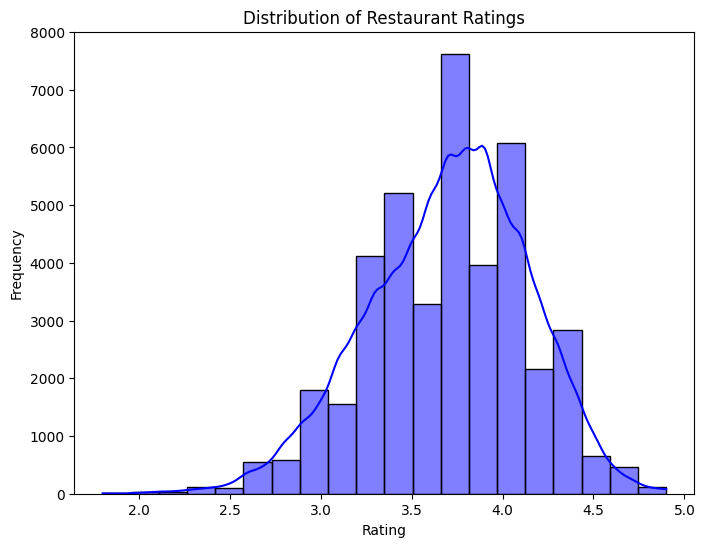

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['rate'], bins=20, kde=True, color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

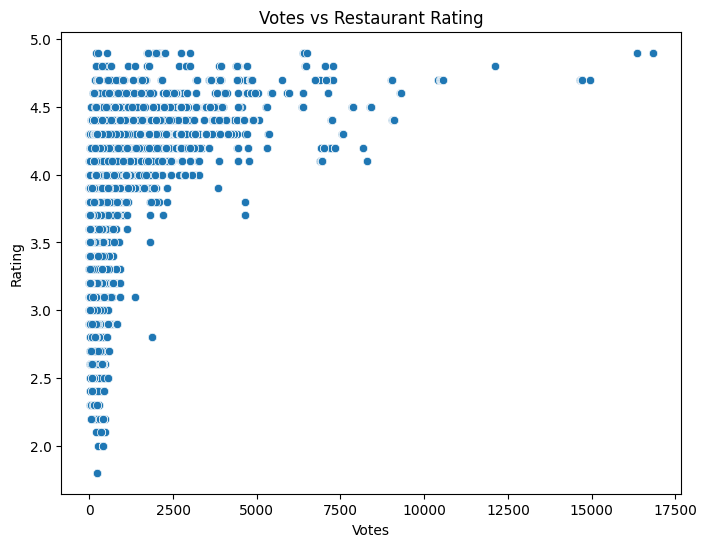

In [21]:
# Scatter plot to visualize votes vs. ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='votes', y='rate', data=df)
plt.title('Votes vs Restaurant Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

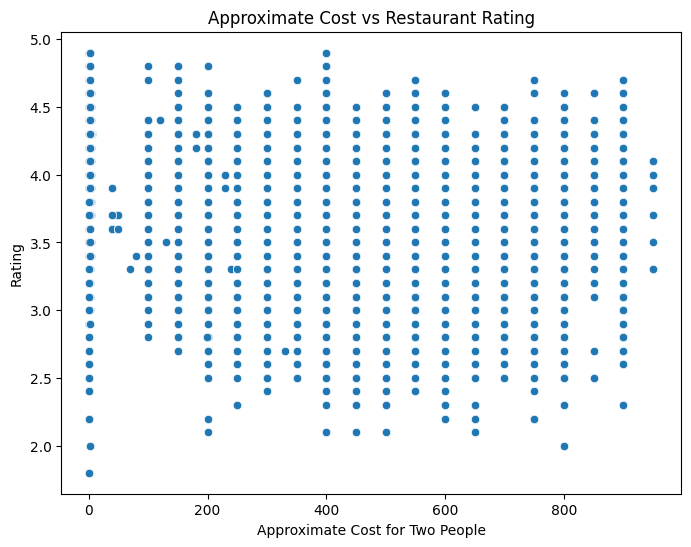

In [22]:
# Scatter plot for approx cost vs rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost', y='rate', data=df)
plt.title('Approximate Cost vs Restaurant Rating')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Rating')
plt.show()


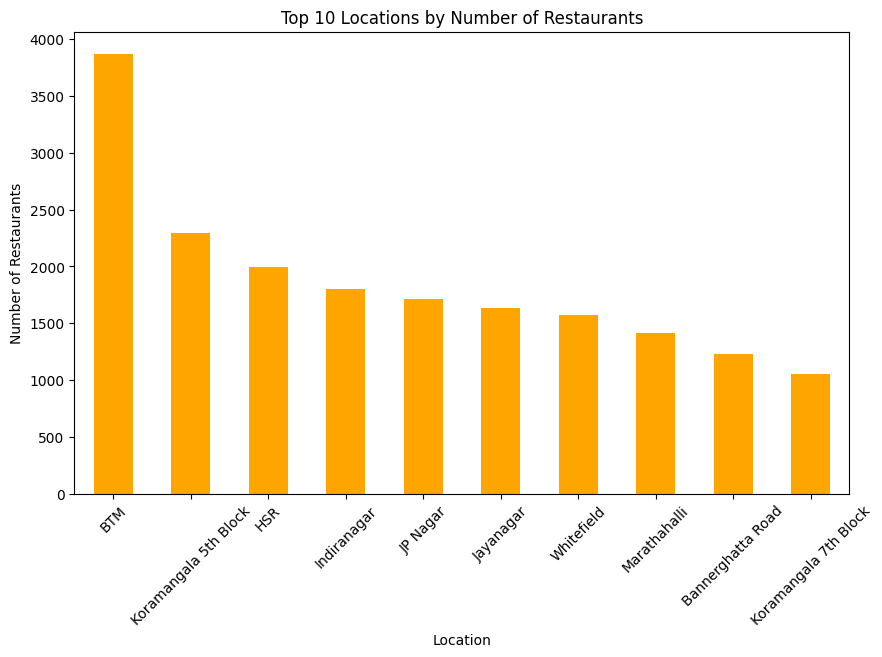

In [23]:
# Calculate the number of restaurants per location
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='orange')
plt.title('Top 10 Locations by Number of Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

### Insights about restaurant characteristics and customer preferences

In [24]:
# Average Rating:
average_rating = df['rate'].mean()
print(f"Average Rating of Restaurants: {average_rating}")

Average Rating of Restaurants: 3.702029730581759


In [25]:
# Variation in Ratings by Restaurant Type
avg_rating_by_type = df.groupby('rest_type')['rate'].mean()
print(avg_rating_by_type.head())

rest_type
Bakery                    3.607955
Bakery, Beverage Shop     3.200000
Bakery, Cafe              4.009722
Bakery, Dessert Parlor    3.687402
Bakery, Food Court        3.100000
Name: rate, dtype: float64


North Indian                           2107
North Indian, Chinese                  1949
South Indian                           1231
Cafe                                    620
Bakery, Desserts                        613
Biryani                                 600
South Indian, North Indian, Chinese     561
Desserts                                545
Fast Food                               513
Chinese                                 409
Name: cuisines, dtype: int64


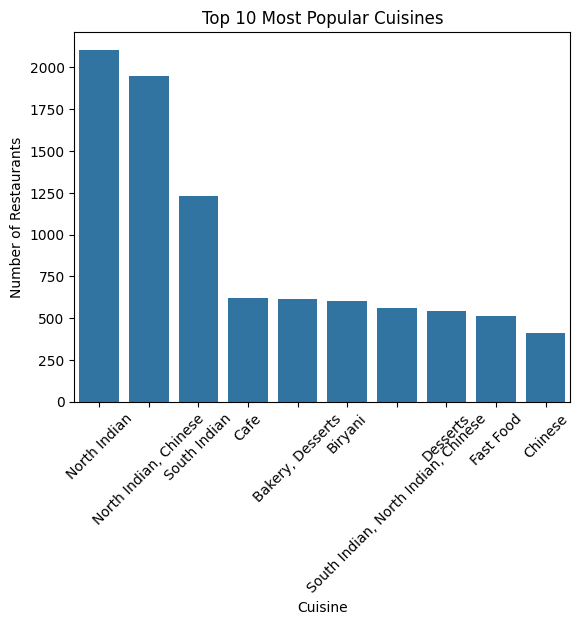

In [26]:
# Customer Preferences Based on Cuisine
popular_cuisines = df['cuisines'].value_counts().head(10)
print(popular_cuisines)
sns.barplot(x=popular_cuisines.index, y=popular_cuisines.values)
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Average Cost for Two People
avg_cost = df['cost'].mean()
print(f"Average Cost for Two People: {avg_cost}")

Average Cost for Two People: 369.5862586997114


In [ ]:
# data save as clean_zomato.csv
df.to_csv("D:\Restaurant Recommendation Project\data\clean_zomato.csv", index=False)
